### <font color = 'red'> 1) Importing Modules

In [11]:
import tensorflow as tf
import keras
import pandas as pd
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,BatchNormalization,Conv2D,MaxPool2D
from tensorflow.keras.applications import MobileNet,VGG16
import matplotlib.pyplot as plt

### <font color = 'red'> 2) Reading data from Folders unsing IMAGEDATA GENERATOR

In [12]:
train_generator = ImageDataGenerator(rotation_range=20,
                                     width_shift_range=0.2,
                                     height_shift_range=0.2,
                                     shear_range=0.2,
                                     zoom_range=0.2,
                                    rescale=1./255,
                                    horizontal_flip=True,
                                  fill_mode='nearest')

In [13]:
valid_generator = ImageDataGenerator(rescale=1./255)

In [14]:
train_dir = "C:\\Users\\STSC\OneDrive - horizon.csueastbay.edu\\Documents\\TensorFlow\\Coursera\\CNN\\New Masks Dataset\\Train" 

In [15]:
valid_dir = "C:\\Users\\STSC\OneDrive - horizon.csueastbay.edu\\Documents\\TensorFlow\\Coursera\\CNN\\New Masks Dataset\\Validation" 

In [16]:
training = train_generator.flow_from_directory(train_dir,
                                               target_size=(224,224),
                                               class_mode='binary',
                                               batch_size=20,
                                              classes=['Mask','Non Mask'],)

Found 1020 images belonging to 2 classes.


In [17]:
validation = valid_generator.flow_from_directory(valid_dir,
                                                target_size=(224,224),
                                                 class_mode='binary',
                                                 batch_size=20,
                                                classes=['Mask','Non Mask'])

Found 307 images belonging to 2 classes.


- #### <Font color = 'red'> Now training and validatation are loaded with respective their class labels.

- #### <Font color = 'red'> Note that data is loaded in batches that is there are 1020 in training directory and our batch size while pulling the data is 20,so we will have around 51 batches of data with each having 20 images with repsective labels

In [18]:
'''Each batch can be accesed by using a key word next()'''

(image,labels) = next(training)

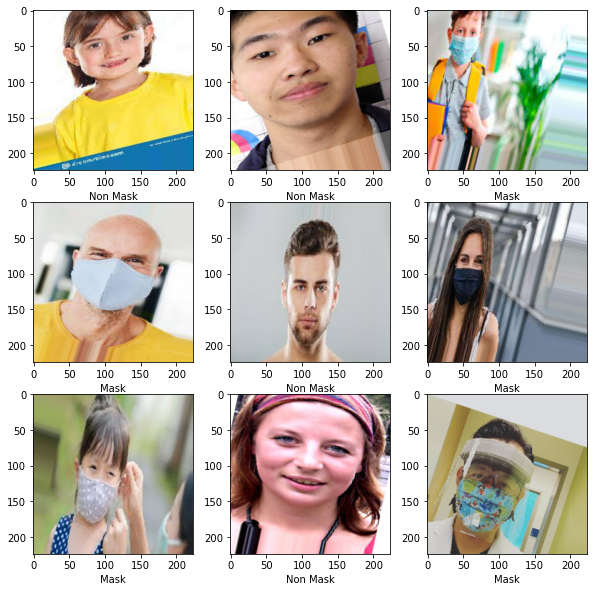

In [19]:
''' Plotting images '''  

plt.figure(figsize=(10,10))
for i in range(0,9):
    plt.subplot(3,3,i+1)
    plt.imshow(image[i])
    plt.xlabel("Mask" if int(labels[i])==0.0 else "Non Mask")

### <font color = 'red'> 3) Pre trained Model Mobilenet

In [20]:
pre_trained_model = tf.keras.applications.MobileNetV2(input_shape=(224,224,3),
                               weights='imagenet',include_top=False)

In [21]:
pre_trained_model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                              

 block_3_expand_relu (ReLU)     (None, 56, 56, 144)  0           ['block_3_expand_BN[0][0]']      
                                                                                                  
 block_3_pad (ZeroPadding2D)    (None, 57, 57, 144)  0           ['block_3_expand_relu[0][0]']    
                                                                                                  
 block_3_depthwise (DepthwiseCo  (None, 28, 28, 144)  1296       ['block_3_pad[0][0]']            
 nv2D)                                                                                            
                                                                                                  
 block_3_depthwise_BN (BatchNor  (None, 28, 28, 144)  576        ['block_3_depthwise[0][0]']      
 malization)                                                                                      
                                                                                                  
 block_3_d

 lization)                                                                                        
                                                                                                  
 block_7_expand (Conv2D)        (None, 14, 14, 384)  24576       ['block_6_project_BN[0][0]']     
                                                                                                  
 block_7_expand_BN (BatchNormal  (None, 14, 14, 384)  1536       ['block_7_expand[0][0]']         
 ization)                                                                                         
                                                                                                  
 block_7_expand_relu (ReLU)     (None, 14, 14, 384)  0           ['block_7_expand_BN[0][0]']      
                                                                                                  
 block_7_depthwise (DepthwiseCo  (None, 14, 14, 384)  3456       ['block_7_expand_relu[0][0]']    
 nv2D)    

                                                                                                  
 block_10_depthwise_relu (ReLU)  (None, 14, 14, 384)  0          ['block_10_depthwise_BN[0][0]']  
                                                                                                  
 block_10_project (Conv2D)      (None, 14, 14, 96)   36864       ['block_10_depthwise_relu[0][0]']
                                                                                                  
 block_10_project_BN (BatchNorm  (None, 14, 14, 96)  384         ['block_10_project[0][0]']       
 alization)                                                                                       
                                                                                                  
 block_11_expand (Conv2D)       (None, 14, 14, 576)  55296       ['block_10_project_BN[0][0]']    
                                                                                                  
 block_11_

 block_14_depthwise (DepthwiseC  (None, 7, 7, 960)   8640        ['block_14_expand_relu[0][0]']   
 onv2D)                                                                                           
                                                                                                  
 block_14_depthwise_BN (BatchNo  (None, 7, 7, 960)   3840        ['block_14_depthwise[0][0]']     
 rmalization)                                                                                     
                                                                                                  
 block_14_depthwise_relu (ReLU)  (None, 7, 7, 960)   0           ['block_14_depthwise_BN[0][0]']  
                                                                                                  
 block_14_project (Conv2D)      (None, 7, 7, 160)    153600      ['block_14_depthwise_relu[0][0]']
                                                                                                  
 block_14_

#### We can access any layer we want from the pre trained model.

In [22]:
pre_trained_model.get_layer("block_11_add")

- ####  <font color = 'red' size = 4> **Main purpose behind transfer learning is to use pre trained model & use its weights, so that we can reduce the compuational time in training the model.**
- #### <font size =4>So before working with pretarined models like **Mobilenet**,**VGG**,**ResNet** we need to make sure that the layers in pretained model is frezzed and not used for training.

In [23]:
'''Freezing already trained layers in the pretrained layers'''

for layer in pre_trained_model.layers:
    layer.trainable = False

Using the output of pretained model as our first layer

In [24]:
model = Flatten()(pre_trained_model.output)
model = Dense(64,activation = tf.nn.relu)(model)
model = Dropout(0.5)(model)
model = Dense(64,activation = tf.nn.relu)(model)
model = Dense(1,activation = tf.nn.sigmoid)(model)

In [25]:
main_model = tf.keras.Model(pre_trained_model.input,model)

In [26]:
main_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                                             

 block_3_expand_relu (ReLU)     (None, 56, 56, 144)  0           ['block_3_expand_BN[0][0]']      
                                                                                                  
 block_3_pad (ZeroPadding2D)    (None, 57, 57, 144)  0           ['block_3_expand_relu[0][0]']    
                                                                                                  
 block_3_depthwise (DepthwiseCo  (None, 28, 28, 144)  1296       ['block_3_pad[0][0]']            
 nv2D)                                                                                            
                                                                                                  
 block_3_depthwise_BN (BatchNor  (None, 28, 28, 144)  576        ['block_3_depthwise[0][0]']      
 malization)                                                                                      
                                                                                                  
 block_3_d

 lization)                                                                                        
                                                                                                  
 block_7_expand (Conv2D)        (None, 14, 14, 384)  24576       ['block_6_project_BN[0][0]']     
                                                                                                  
 block_7_expand_BN (BatchNormal  (None, 14, 14, 384)  1536       ['block_7_expand[0][0]']         
 ization)                                                                                         
                                                                                                  
 block_7_expand_relu (ReLU)     (None, 14, 14, 384)  0           ['block_7_expand_BN[0][0]']      
                                                                                                  
 block_7_depthwise (DepthwiseCo  (None, 14, 14, 384)  3456       ['block_7_expand_relu[0][0]']    
 nv2D)    

                                                                                                  
 block_10_depthwise_relu (ReLU)  (None, 14, 14, 384)  0          ['block_10_depthwise_BN[0][0]']  
                                                                                                  
 block_10_project (Conv2D)      (None, 14, 14, 96)   36864       ['block_10_depthwise_relu[0][0]']
                                                                                                  
 block_10_project_BN (BatchNorm  (None, 14, 14, 96)  384         ['block_10_project[0][0]']       
 alization)                                                                                       
                                                                                                  
 block_11_expand (Conv2D)       (None, 14, 14, 576)  55296       ['block_10_project_BN[0][0]']    
                                                                                                  
 block_11_

 block_14_depthwise (DepthwiseC  (None, 7, 7, 960)   8640        ['block_14_expand_relu[0][0]']   
 onv2D)                                                                                           
                                                                                                  
 block_14_depthwise_BN (BatchNo  (None, 7, 7, 960)   3840        ['block_14_depthwise[0][0]']     
 rmalization)                                                                                     
                                                                                                  
 block_14_depthwise_relu (ReLU)  (None, 7, 7, 960)   0           ['block_14_depthwise_BN[0][0]']  
                                                                                                  
 block_14_project (Conv2D)      (None, 7, 7, 160)    153600      ['block_14_depthwise_relu[0][0]']
                                                                                                  
 block_14_

In [27]:
main_model.compile(loss='binary_crossentropy',optimizer = 'adam',metrics='accuracy')

In [28]:
history = main_model.fit(training,
                         batch_size=32,
                         epochs=10,
                         validation_data=validation,
                         validation_steps=10)

Epoch 1/10
51/51 [==============================] - 37s 665ms/step - loss: 0.9518 - accuracy: 0.8853 - val_loss: 0.0285 - val_accuracy: 0.9900
Epoch 2/10
51/51 [==============================] - 28s 553ms/step - loss: 0.2616 - accuracy: 0.9549 - val_loss: 0.0072 - val_accuracy: 1.0000
Epoch 3/10
51/51 [==============================] - 29s 566ms/step - loss: 0.1979 - accuracy: 0.9490 - val_loss: 0.0520 - val_accuracy: 0.9750
Epoch 4/10
51/51 [==============================] - 30s 595ms/step - loss: 0.1035 - accuracy: 0.9569 - val_loss: 0.0389 - val_accuracy: 0.9850
Epoch 5/10
51/51 [==============================] - 30s 585ms/step - loss: 0.1158 - accuracy: 0.9569 - val_loss: 0.0297 - val_accuracy: 0.9950
Epoch 6/10
51/51 [==============================] - 30s 580ms/step - loss: 0.1028 - accuracy: 0.9667 - val_loss: 0.0307 - val_accuracy: 0.9950
Epoch 7/10
51/51 [==============================] - 30s 592ms/step - loss: 0.1123 - accuracy: 0.9647 - val_loss: 0.0152 - val_accuracy: 1.0000

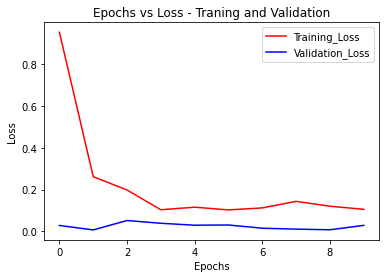

In [29]:
plt.plot(history.history['loss'],"r",label = "Training_Loss")
plt.plot(history.history['val_loss'],'b',label = "Validation_Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(loc='upper right')
plt.title("Epochs vs Loss - Traning and Validation")
plt.show()


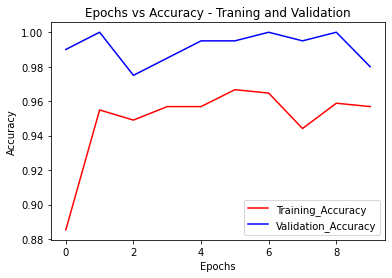

In [30]:
plt.plot(history.history['accuracy'],"r",label = "Training_Accuracy")
plt.plot(history.history['val_accuracy'],'b',label = "Validation_Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Epochs vs Accuracy - Traning and Validation")
plt.legend(loc='lower right')
plt.show()

In [31]:
'''Saving the model'''

main_model.save("MaskDetection.h5")

In [32]:
pred = []
labels = []

In [33]:
for i in range(0,(len(training.index_array)//20)+1):
    i , l = next(training)
    
    pred.extend(main_model.predict(i))
    
    labels.extend(l)
    

1/1 [==============================] - 0s 340ms/step


In [34]:
pred = pd.DataFrame(pred,columns = ['prob'])
pred

,prob
0,1.295572e-13
1,1.000000e+00
2,1.626486e-07
3,1.120220e-12
4,1.000000e+00
...,...
1035,1.000000e+00
1036,1.323275e-06
1037,1.688323e-13
1038,9.409196e-12


In [35]:
l = list(pred['prob'].apply(lambda x :"Mask on" if x < 0.5 else "Mask Off").values)
l

['Mask on',
 'Mask Off',
 'Mask on',
 'Mask on',
 'Mask Off',
 'Mask on',
 'Mask Off',
 'Mask on',
 'Mask Off',
 'Mask Off',
 'Mask on',
 'Mask on',
 'Mask Off',
 'Mask on',
 'Mask on',
 'Mask on',
 'Mask on',
 'Mask Off',
 'Mask on',
 'Mask Off',
 'Mask on',
 'Mask on',
 'Mask Off',
 'Mask on',
 'Mask Off',
 'Mask on',
 'Mask on',
 'Mask on',
 'Mask on',
 'Mask on',
 'Mask Off',
 'Mask Off',
 'Mask on',
 'Mask Off',
 'Mask on',
 'Mask Off',
 'Mask Off',
 'Mask on',
 'Mask on',
 'Mask on',
 'Mask Off',
 'Mask on',
 'Mask on',
 'Mask on',
 'Mask Off',
 'Mask Off',
 'Mask Off',
 'Mask on',
 'Mask on',
 'Mask on',
 'Mask Off',
 'Mask on',
 'Mask Off',
 'Mask Off',
 'Mask on',
 'Mask on',
 'Mask on',
 'Mask on',
 'Mask Off',
 'Mask Off',
 'Mask Off',
 'Mask Off',
 'Mask Off',
 'Mask on',
 'Mask on',
 'Mask on',
 'Mask Off',
 'Mask Off',
 'Mask on',
 'Mask Off',
 'Mask Off',
 'Mask on',
 'Mask on',
 'Mask on',
 'Mask Off',
 'Mask on',
 'Mask Off',
 'Mask Off',
 'Mask on',
 'Mask on',
 'Mask

In [36]:
predicted = list(pred['prob'].apply(lambda x :0 if x < 0.5 else 1).values)

In [37]:
la = list(labels)

In [38]:
from sklearn import metrics

print(metrics.classification_report(predicted,la ,target_names=['Mask','Without Mask'] ))

              precision    recall  f1-score   support

        Mask       0.99      0.99      0.99       518
Without Mask       0.99      0.99      0.99       522

    accuracy                           0.99      1040
   macro avg       0.99      0.99      0.99      1040
weighted avg       0.99      0.99      0.99      1040



In [39]:
from sklearn import metrics

print(metrics.classification_report(predicted,la ,target_names=['Mask','Without Mask'] ))

              precision    recall  f1-score   support

        Mask       0.99      0.99      0.99       518
Without Mask       0.99      0.99      0.99       522

    accuracy                           0.99      1040
   macro avg       0.99      0.99      0.99      1040
weighted avg       0.99      0.99      0.99      1040

